# Gravity Machine analysis notebook

In [53]:
import numpy as np
import GravityMachine.Analysis as Analysis
import imp
imp.reload(Analysis)
import matplotlib.pyplot as plt
%matplotlib notebook

NameError: name 'units' is not defined

In [51]:
track_folder = 'D:\GravityMachine_2020\DiatomData_withv2codebase_forTesting\cell8_blinks_2021-01-05 20-25-23'
track_file = 'track000.csv'

gm_analysis = Analysis.GravityMachineAnalysis(track_folder = track_folder, track_file = track_file)

**************************************************
Loading metadata file ...
Loaded metadata...
{'Local time': '2021-01-05, 20:25:23.438289', 'PixelPermm': 1066, 'Objective': '10x'}
**************************************************


<IPython.core.display.Javascript object>


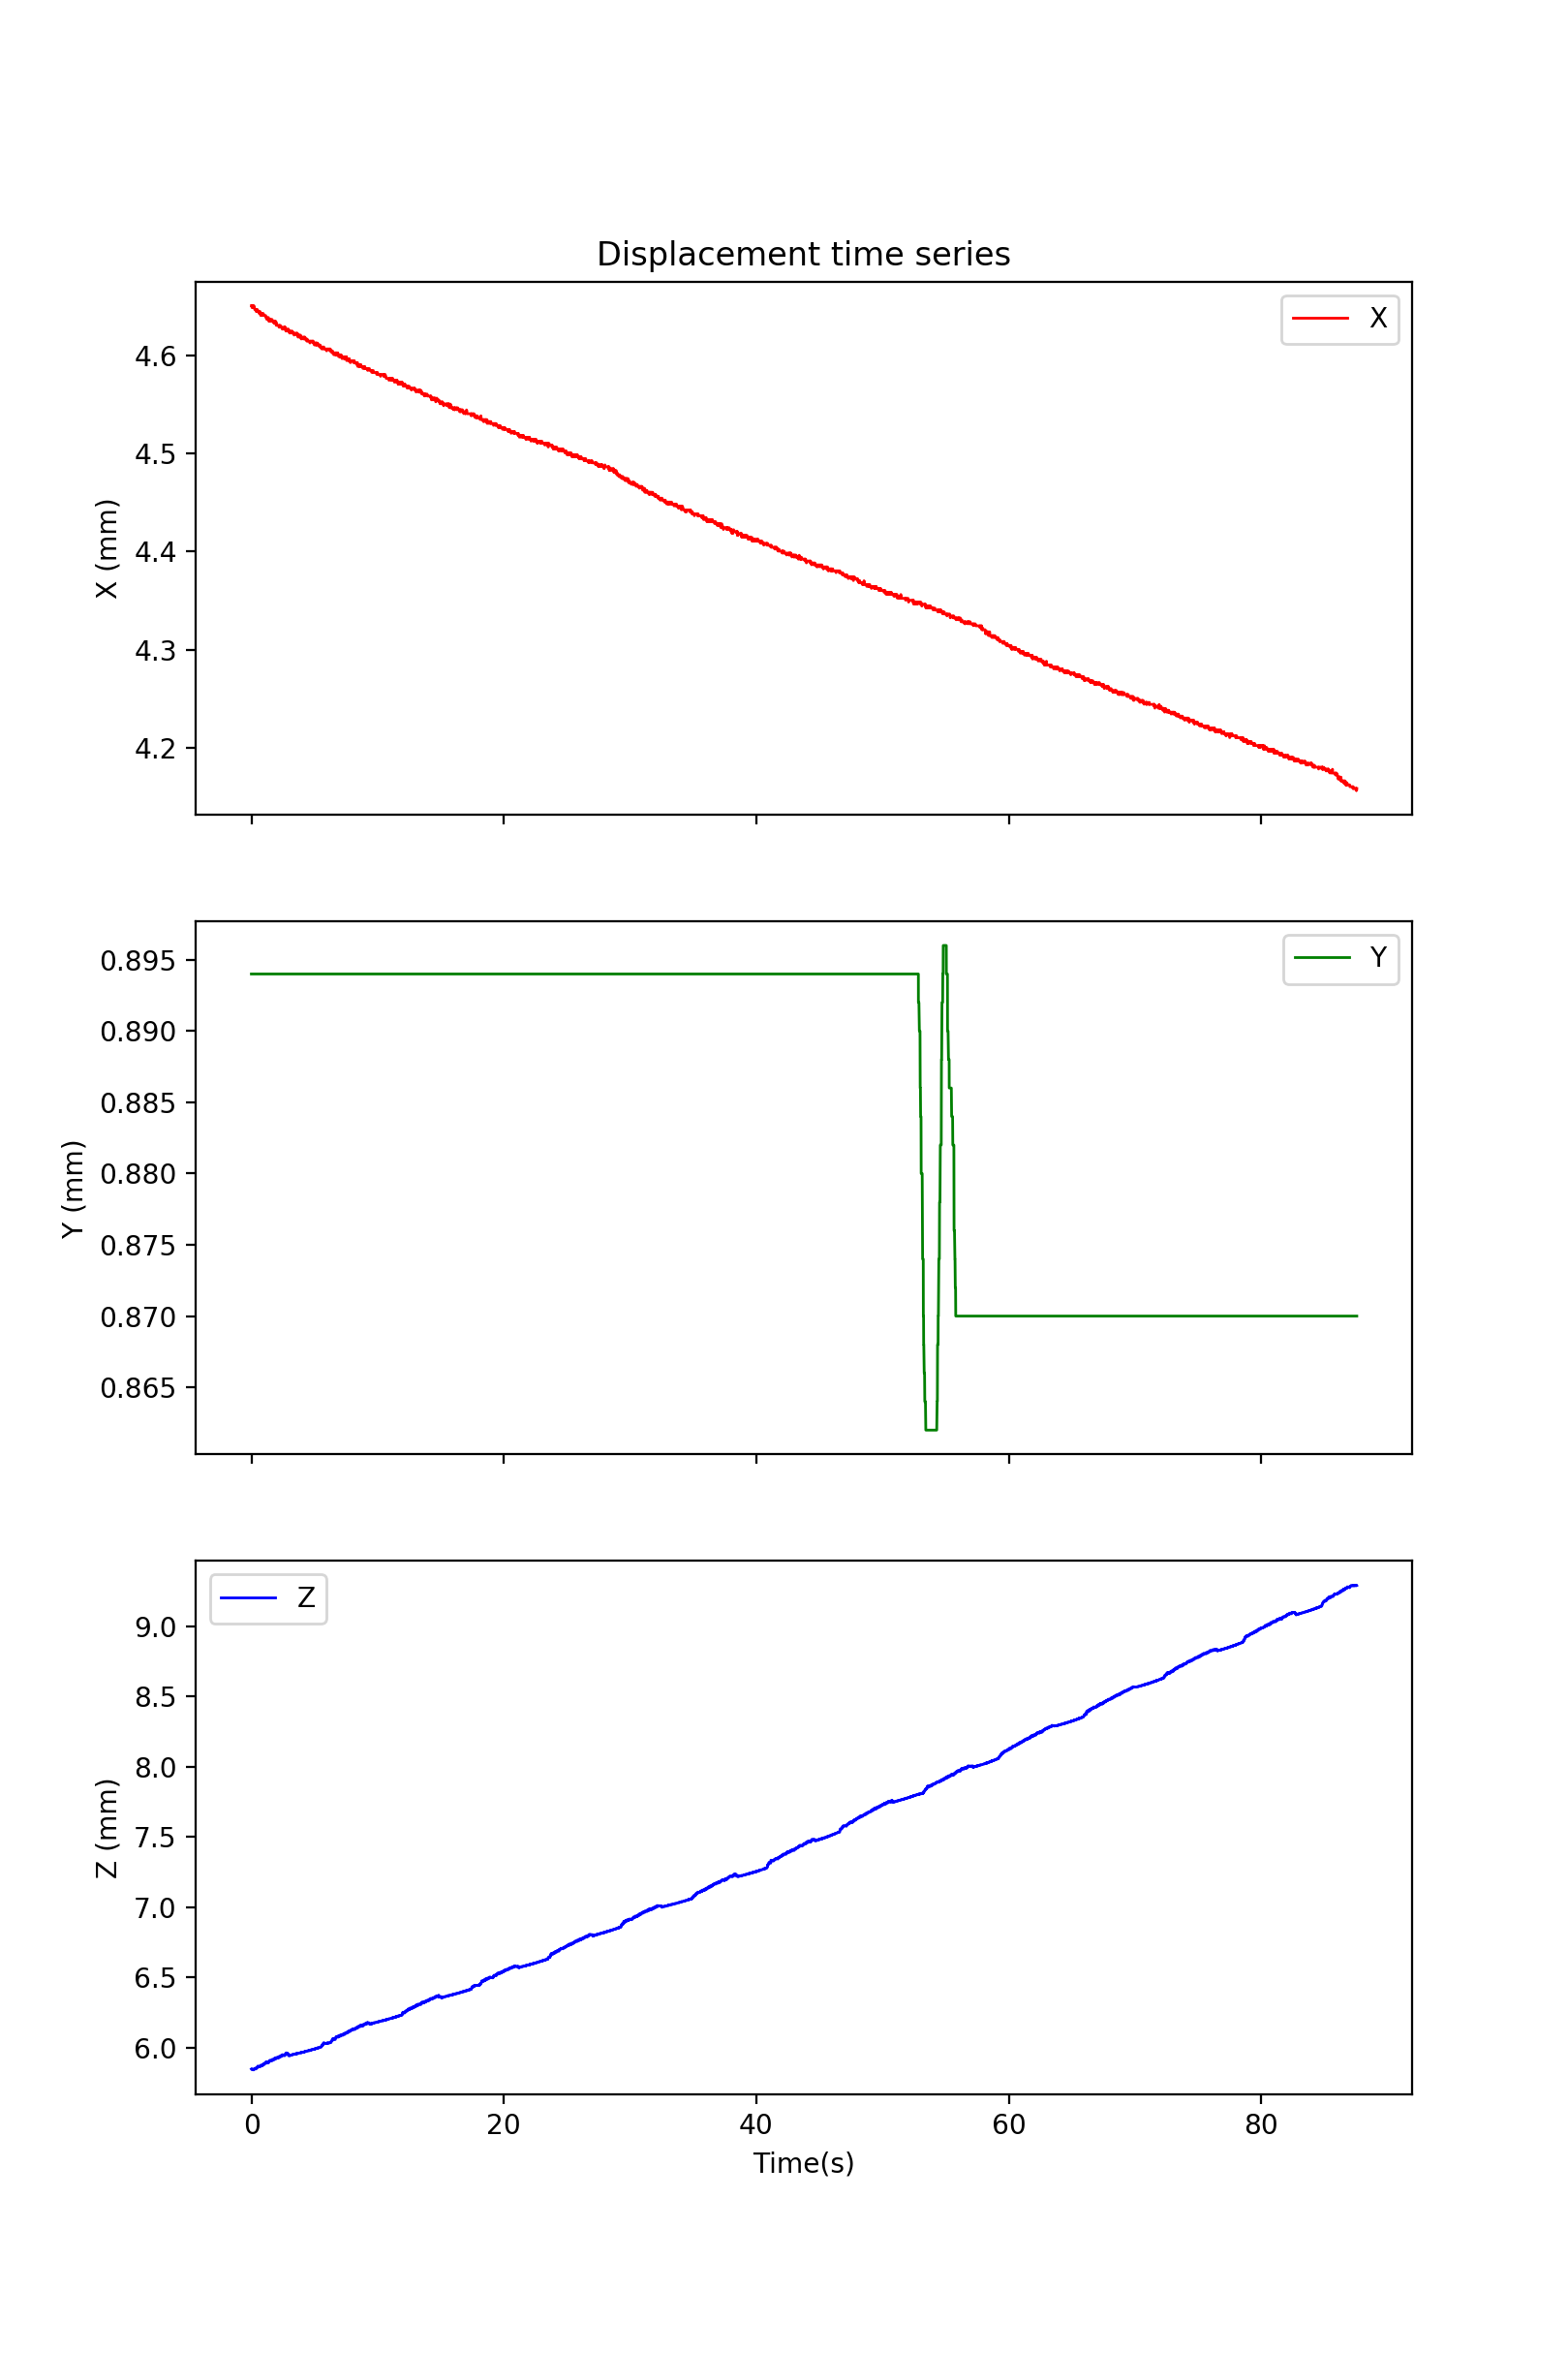

In [47]:
# Plots of displacement
import seaborn as sns
units = {'Time':'(s)', 'X':'(mm)','Y':'(mm)','Z':'(mm)'}

title = 'Displacement time series'
f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize = (8,12))
ax1.set_title(title)
sns.lineplot(x = gm_analysis.data['Time'], y = gm_analysis.data['X'], color = 'r', linewidth = 1, label = 'X', ax = ax1)
ax1.set_ylabel('X '+units['X'])
sns.lineplot(x = gm_analysis.data['Time'], y = gm_analysis.data['Y'], color = 'g', linewidth = 1, label = 'Y', ax = ax2)
ax2.set_ylabel('Y '+units['Y'])
sns.lineplot(x = gm_analysis.data['Time'], y = gm_analysis.data['Z'], color = 'b', linewidth = 1, label = 'Z', ax = ax3)
ax3.set_ylabel('Z '+units['Z'])
ax3.set_xlabel('Time' + units['Time'])
plt.show()

<IPython.core.display.Javascript object>


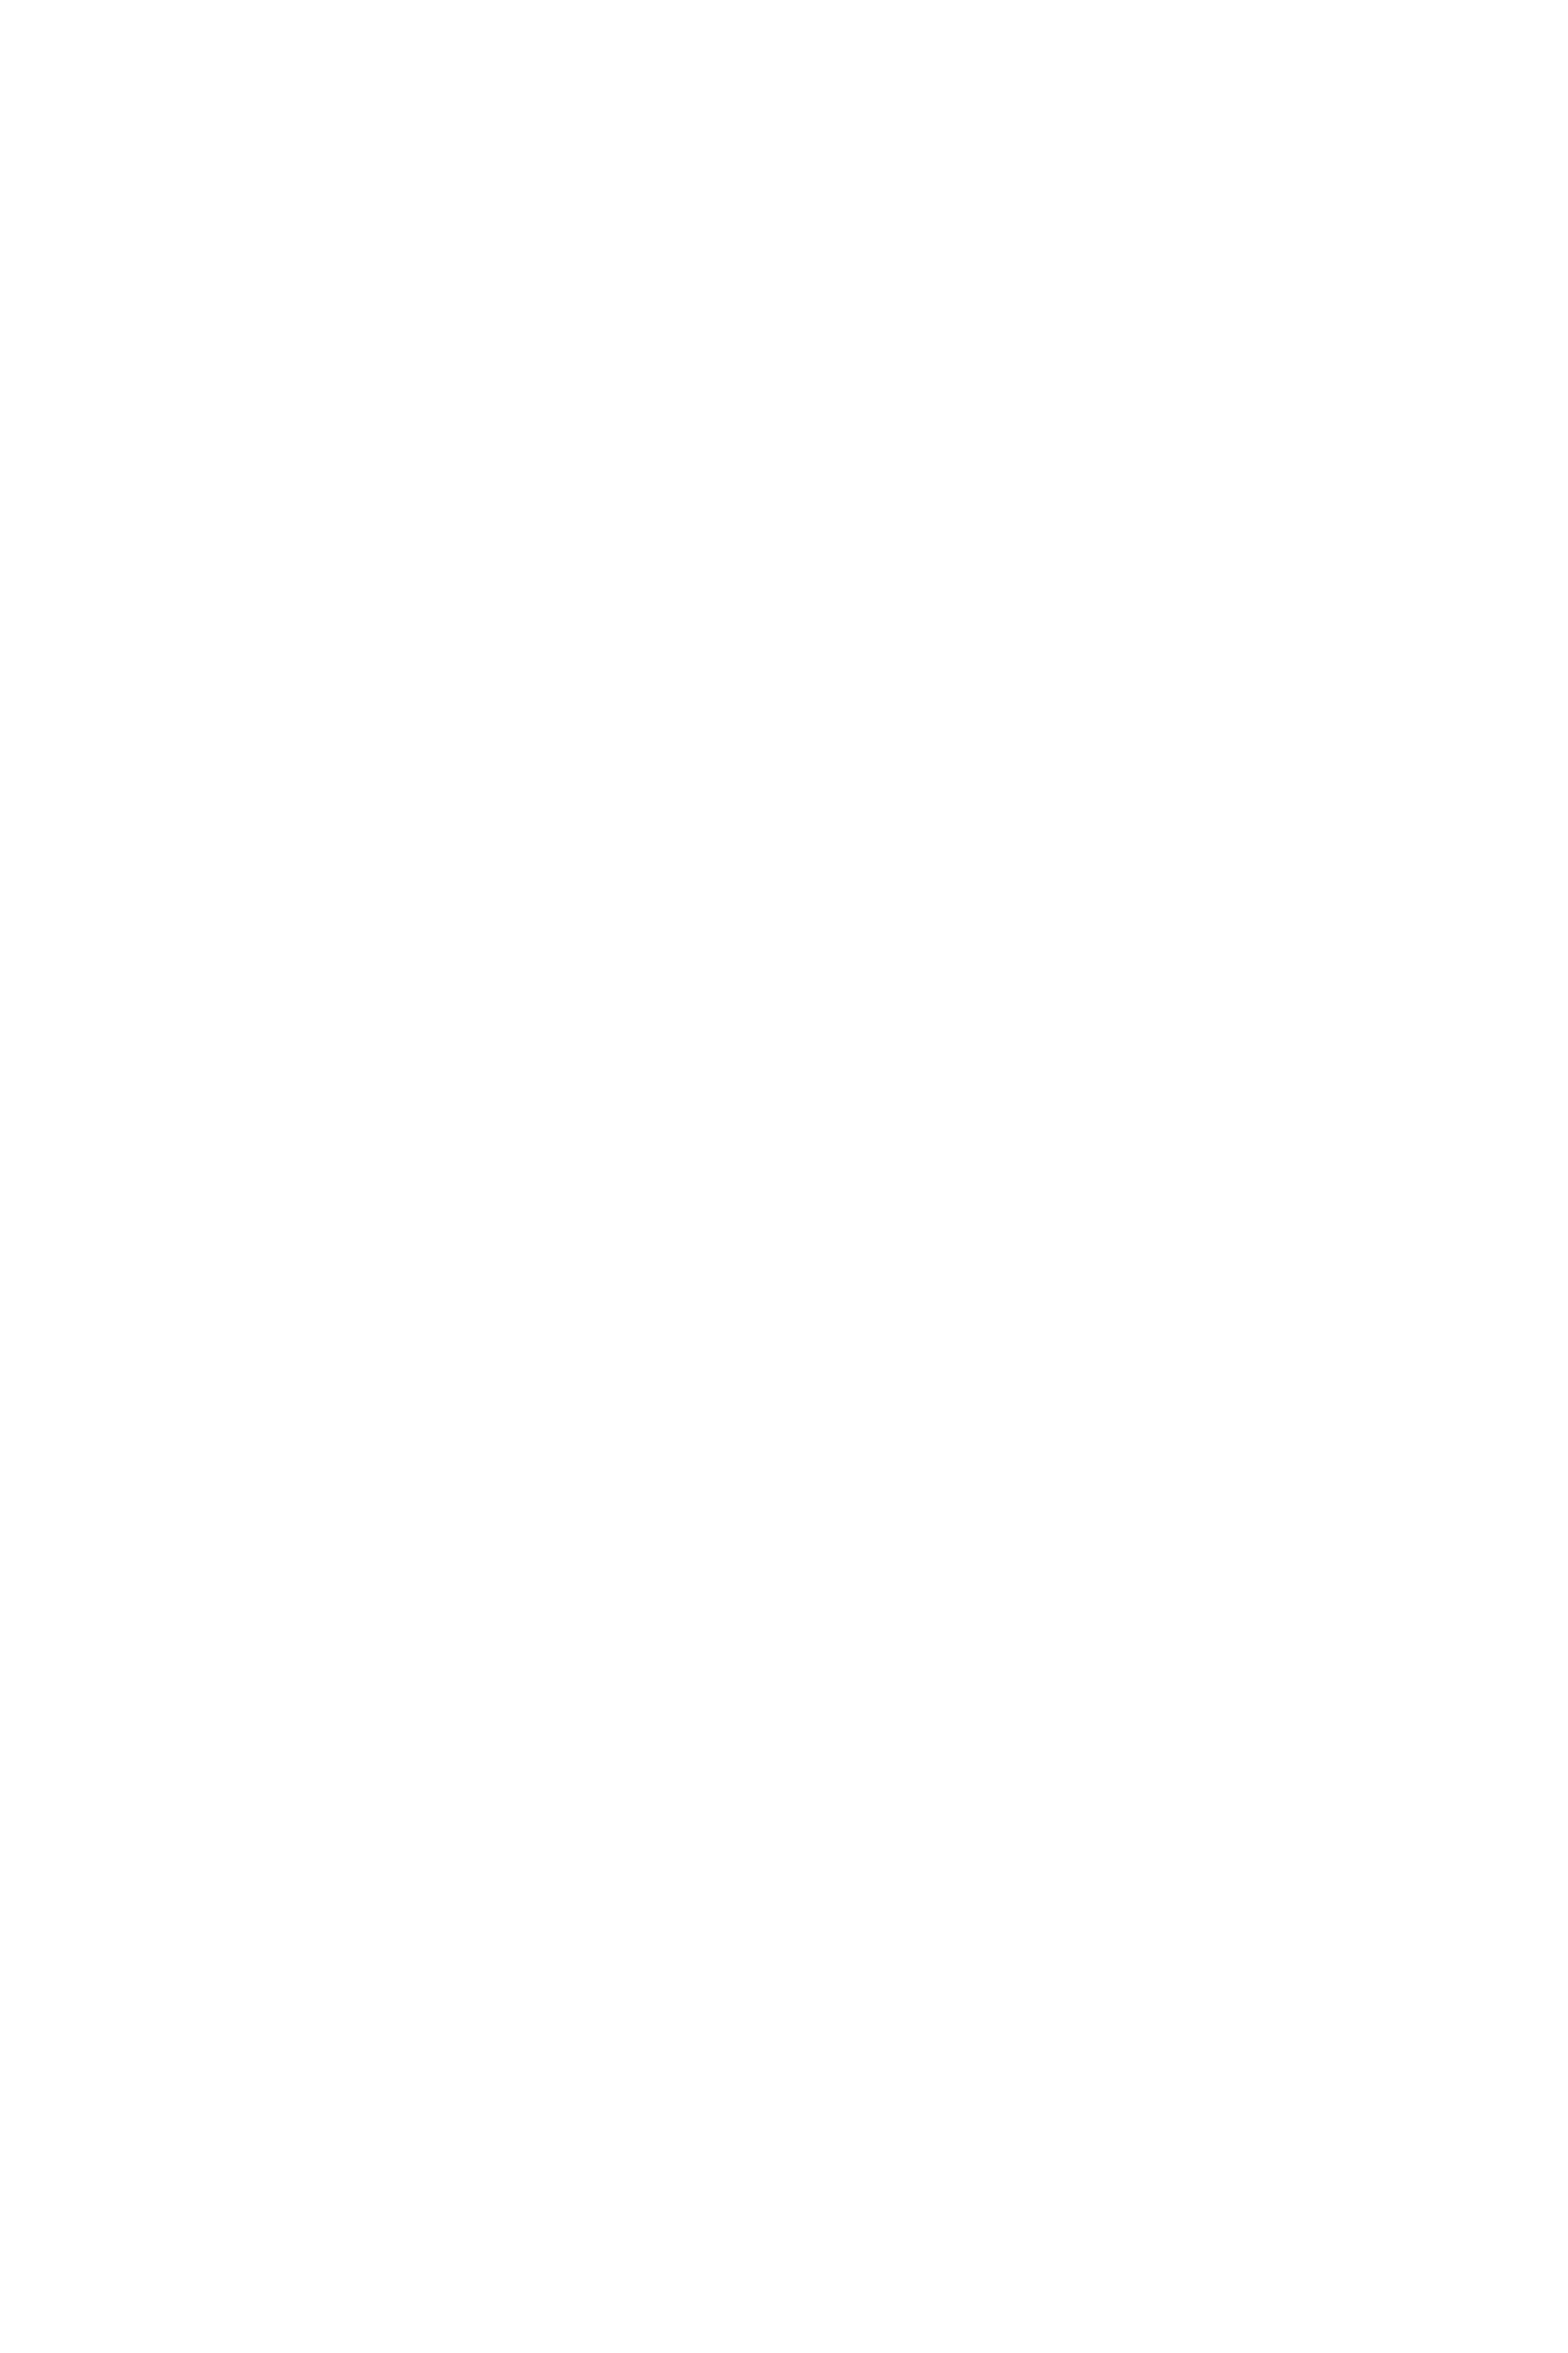

NameError: name 'units' is not defined

In [52]:
gm_analysis.plot_displacement_timeseries()